In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data2.csv")
print(df.shape)
df

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Age : Age of the patient
Sex : Sex of the patient
exang: exercise induced angina 
ca: number of major vessels (0-3)
cp : Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)
chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved
target : 0= less chance of heart attack 1= more chance of heart attack

In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


$\textbf{Посмотрим немного на графики распределения данных:}$

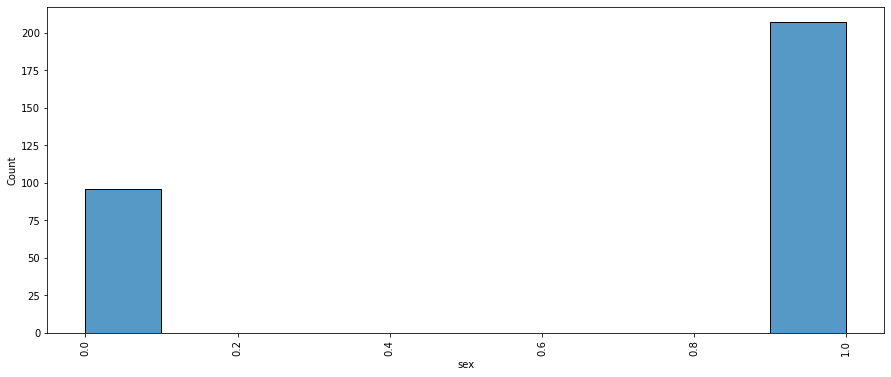

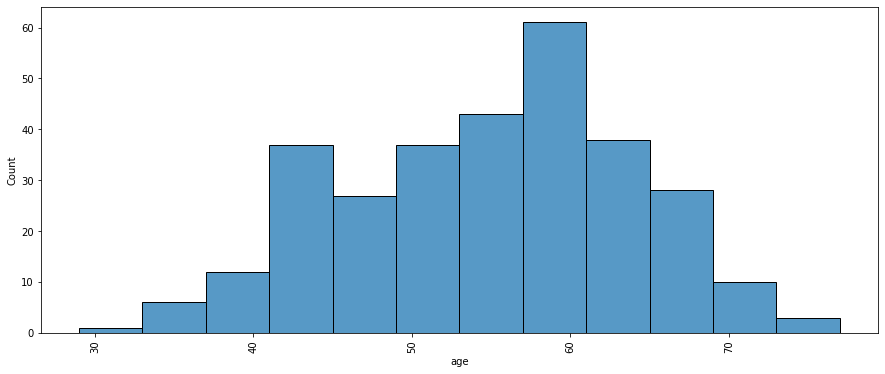

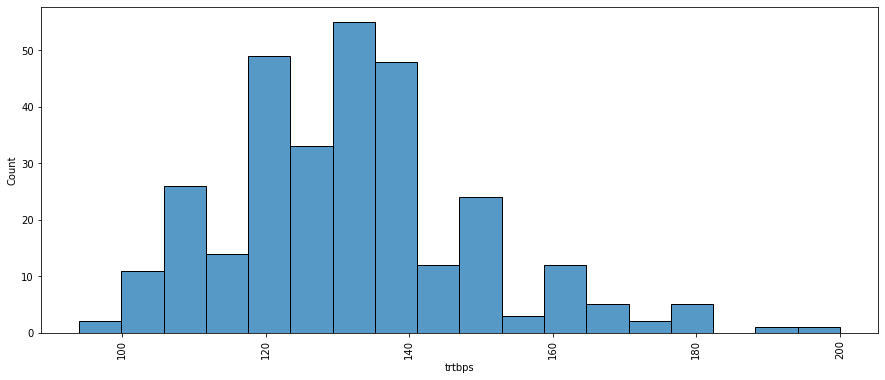

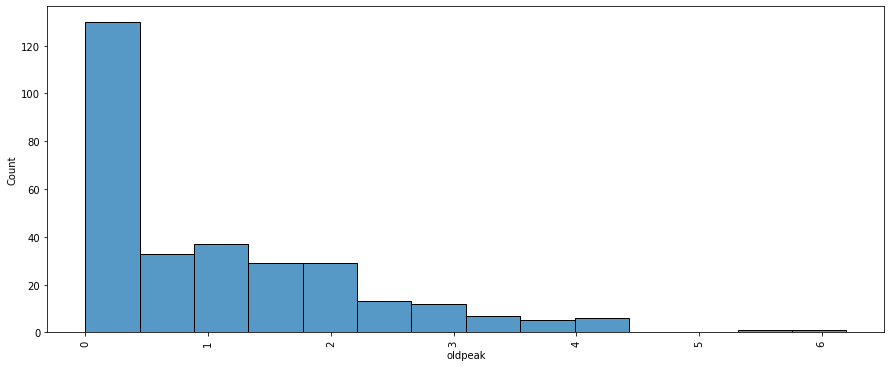

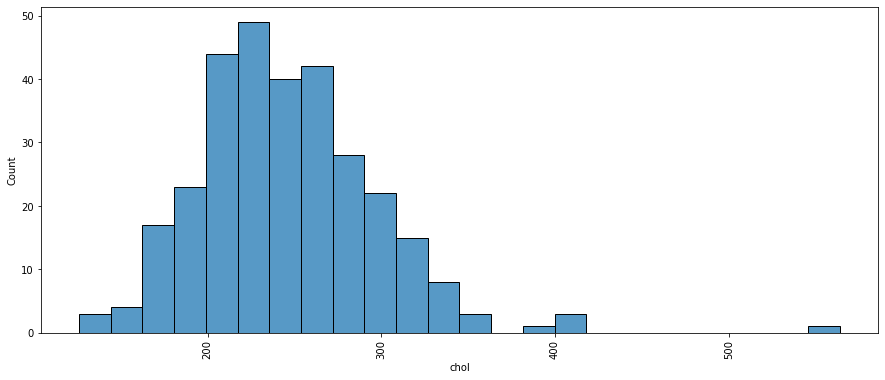

In [5]:
distribution_chart_columns = ['sex', 'age',
       'trtbps', 'oldpeak', 'chol']
for i in distribution_chart_columns:
    plt.figure(figsize=(15, 6))
    sns.histplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

Теперь посмотрим на долю больных и здоровых людей по разным категориям:

In [6]:
df_age = df[["age", "output"]]
df_age = df_age.groupby('age').mean()

In [7]:
df_age.reset_index(inplace= True )

In [8]:
df_age

,age,output
0,29,1.000000
1,34,1.000000
2,35,0.500000
3,37,1.000000
4,38,0.666667
5,39,0.750000
6,40,0.333333
7,41,0.900000
8,42,0.875000
9,43,0.625000


Посмотрим на вероятность/долю инфаркта по разным возрастам:

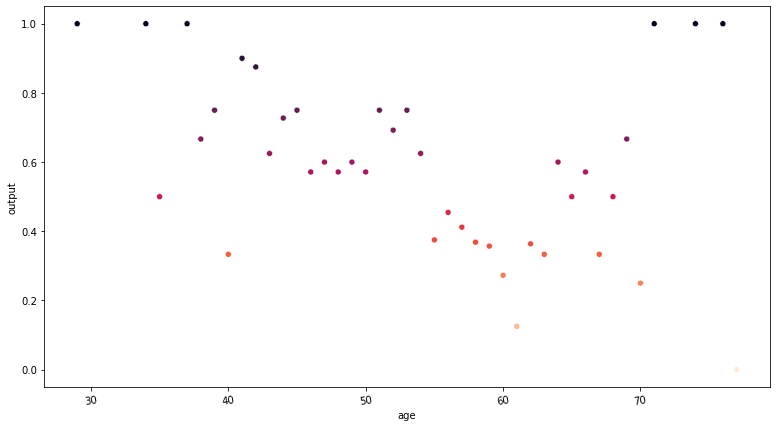

In [9]:
f, ax = plt.subplots(figsize=(13, 7))
sns.scatterplot(
    x="age",
    y="output",
    hue="output", palette=sns.color_palette("rocket_r", as_cmap=True),
    sizes=(1, 8),
    linewidth=0.5,
    data=df_age,
    ax=ax, legend=False
)
plt.xticks(rotation=9)
plt.show()

$\textbf{Нормализация:}$

In [10]:
df["age"] = df["age"] / 100
df["trtbps"] = df["trtbps"] / 280
df["chol"] = df["chol"] / 600 
df["thalachh"] = df["thalachh"] / 250 

In [11]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.63,1,3,0.517857,0.388333,1,0,0.600,0,2.3,0,0,1,1
1,0.37,1,2,0.464286,0.416667,0,1,0.748,0,3.5,0,0,2,1
2,0.41,0,1,0.464286,0.340000,0,0,0.688,0,1.4,2,0,2,1
3,0.56,1,1,0.428571,0.393333,0,1,0.712,0,0.8,2,0,2,1
4,0.57,0,0,0.428571,0.590000,0,1,0.652,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.57,0,0,0.500000,0.401667,0,1,0.492,1,0.2,1,0,3,0
299,0.45,1,3,0.392857,0.440000,0,1,0.528,0,1.2,1,0,3,0
300,0.68,1,0,0.514286,0.321667,1,1,0.564,0,3.4,1,2,3,0
301,0.57,1,0,0.464286,0.218333,0,1,0.460,1,1.2,1,1,3,0


$\textbf{Распределение на test data и train data}$

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = df.drop(["output"], axis=1)
y = df["output"]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=3
)

$\textbf{Обучение}$

In [15]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm

In [16]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred_log = logistic_model.predict(x_test)

Ошибки logistic model:

In [17]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_log), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_log), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_log), 2)) 

Mean absolute error = 0.13
Mean squared error = 0.13
Explain variance score = 0.42


Корректность:

In [18]:
print("Logistic regression training accuracy score:", logistic_model.score(x_test, y_test))

Logistic regression training accuracy score: 0.8688524590163934


In [19]:
# age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall
def predict_stroke(model, input_data):
    data_array = input_data
    if len(data_array) != 13:
        return -10  # Недостаточно данных
    for i in data_array:
        if type(i) not in [int, float]:
            return -11  # Обнаружено не числовое поле
    for i in [0, 2, 3, 4, 5]:
        if data_array[i] not in [0, 1]:
            return -(i + 1)  # Ошибка в поле №n (нумерация с единицы)

    data_array[0] /= 100
    data_array[3] /= 280
    data_array[4] /= 600
    data_array[4] /= 250
    arr = np.array([data_array, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
    return model.predict(arr)[0]